## Generating biologically more-or-less relevant images using DALL-E
In this notebook we will demonstrate how to ask openAI's DALL-E model to generate biological and medial images (for fun).

Read more:
* [openAI image generation documentation](https://platform.openai.com/docs/guides/images/usage)

In [1]:
import openai
from skimage.io import imread, imshow
from numpy import random
from matplotlib import pyplot as plt

def prompt_image(message:str, width:int=512, height:int=512):
    response = openai.Image.create(
      prompt=message,
      n=1,
      size=f"{width}x{height}"
    )
    image_url = response['data'][0]['url']
    image = imread(image_url)
    
    return image

In [2]:
images = [imread('../../data/banana/banana0011.tif')[170:298, 40:168]]

In [3]:
mri_prompt = """
A single, high resolution, black-white image of 
a realistically looking fruit slice imaged with 
magnetic resonance imaging (MRI).
"""

In [4]:
for _ in range(3):
    images.append(prompt_image(mri_prompt, width=256, height=256)[::2,::2])

In [5]:
random.shuffle(images)

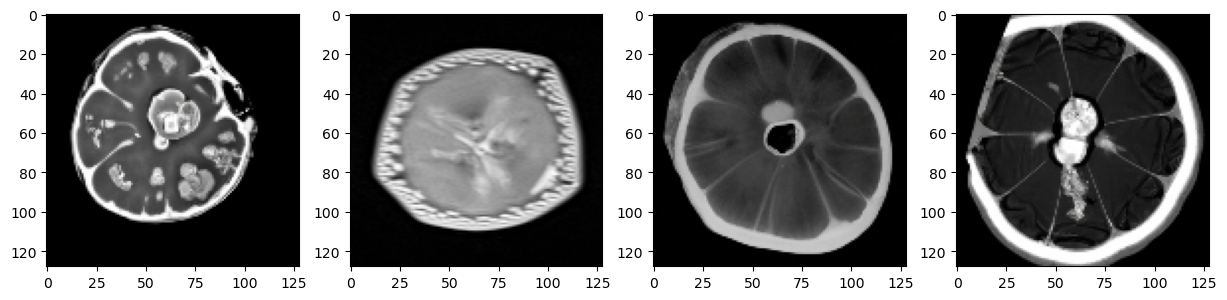

In [6]:
fix, ax = plt.subplots(1,len(images), figsize=(15,15))
for i, image in enumerate(images):
    ax[i].imshow(image, cmap='Greys_r')